# Class 7: Array computations continued

Today we will continue discussing array computations and how it can be applied processing images. If there is time, we will also discuss tuples and dictionaries, and perhaps start discussing the pandas package.

In [105]:
import YData

# YData.download.download_class_code(7)       # get class code    
# YData.download.download_class_code(7, True) # get the code with the answers 
# YData.download_homework(3)  # download the homework 


In [106]:
## If you are using Google Colabs, you should install the YData packages and mount the your google drive by uncommenting and running the code below.

# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')


### Downloading the data for today's class

Please run the code in the cell below to download the data for today's class.

In [107]:
import YData

YData.download_data("movies.csv")
YData.download_image("burns.jpeg")

The file `movies.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `burns.jpeg` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [108]:
# import the numpy package
import numpy as np
import matplotlib.pyplot as plt

## 1. Boolean arrays

We can easily compare all values in an ndarray to a particular value. The result will return an ndarray of Booleans. 

Since Boolean `True` values are treated as 1's, and Boolean `False` values are treated as 0's, this makes it easy to see how many values in an array meet particular conditions. 

In [109]:
# Test all values in an array that are less than 5
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])
my_array < 5

array([False,  True, False,  True,  True,  True, False,  True])

In [110]:
# How many values are less than 5?
np.sum(my_array < 5)

np.int64(5)

### Example: What proportion of movies passed the Bechdel test revisited 

Let's calculate (again) the proportion of movies that passed the Bechdel test, but this time using numpy array computations. 

The code below loads the Bechdel data, and we will focus on the `bechdel` list, which is a list of strings saying whether movies passed ('PASS') or failed ('FAIL') the Bechdel test.



In [111]:
import YData
import pandas as pd

#YData.download_data("movies.csv")

movies = pd.read_csv("movies.csv")
col_names_to_keep = ['year', 'imdb', 'title', 'clean_test', 'binary', 'budget',
       'domgross', 'budget_2013', 'domgross_2013', 'decade_code', 'imdb_id',
       'rated', 'imdb_rating', 'runtime',  'imdb_votes']
movies =   movies[col_names_to_keep]

movies.dropna(axis = 0, how = 'any', inplace = True, subset=col_names_to_keep[0:9])


# get lists of data for our data analysis
title = movies["title"].to_list()
bechdel = movies["binary"].to_list()
bechdel_reason = movies["clean_test"].to_list()

domgross_2013 = movies["domgross_2013"].to_list()
budget_2013 = movies["budget_2013"].to_list() 
year = movies["year"].to_list()


bechdel[0:5]


['FAIL', 'PASS', 'FAIL', 'FAIL', 'FAIL']

In [112]:

# convert the list to an ndarray
bechdel_array = np.array(bechdel)


# create a Boolean array of that is True for movies that passed the Bechdel test
passed_booleans = bechdel_array == "PASS"
print(passed_booleans[0:5])


# calculate the proportion of movies that passed the Bechdel test
print(np.sum(passed_booleans)/passed_booleans.shape[0])


# alternatively, we can use the np.mean() function 
np.mean(passed_booleans)



[False  True False False False]
0.44707207207207206


np.float64(0.44707207207207206)

## 2. Boolean subsetting/indexing/masking

We can use Boolean arrays to return values in another array. This is referred to as "Boolean Subsetting", "Boolean masking" or "Boolean indexing"


In [113]:
# Create a small array
num_array = np.array([8, 2, 5])

# Create a Boolean array
bool_array = np.array([True, False, True])

# Extract values from the num array using the bool_array
num_array[bool_array]


array([8, 5])

In [114]:
# Use the array itself to get the Boolean mask
# Then use the Boolean mask to extract values

# initial array
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])

# create Boolean array for values less than 5
boolean_array = my_array < 5    

print(boolean_array)

# get values of my_array that are less than 5
my_array[boolean_array]


[False  True False  True  True  True False  True]


array([4, 3, 4, 3, 4])

### Example: calculate the average revenue for movies that passed the Bechdel test 

The code below loads our Bechel data. Let's try to calculate the average (mean) revenue for movies that passed the Bechdel test.


In [115]:
# Calculate the average revenue for movies that passed the Bechdel test 
# Hint: convert the bechdel and domgross_2013 lists into arrays and go from there

# create an ndarray from the bechdel and domgross_2013 lists
bechdel_array = np.array(bechdel)
domgross_2013_array = np.array(domgross_2013)


# create a boolean array specifying which movies passed the Bechdel test
passed_booleans = bechdel_array == "PASS"


# use the boolean array to extract movies the pass the Bechdel test
passed_domgross_2013 = domgross_2013_array[passed_booleans]
print(len(passed_domgross_2013))


# get the average revenue of movies that passed the Bechdel test
np.mean(passed_domgross_2013)


794


np.float64(79591918.51259446)

## 3. Percentiles

The $p^{th}$ percentile is the value of a quantitative variable that is greater than $p$ percent of the data. 

We can calculate percentiles using the numpy function `np.percentile()`

Let's calculate the 25th, 50th, and 75th percentile for the Bechdel movie revenue data.


In [116]:
## Get the 25th, 50th and 75th percentile of movie revenues

bechdel_percentiles = np.percentile(domgross_2013_array, [25, 50, 75])

bechdel_percentiles


array([2.05465938e+07, 5.59936405e+07, 1.21678352e+08])

Question: What is another way to calculate the 50th percentile? 


In [117]:
# A: The 50th percentile is the median so we can also calculate it using np.median()

np.median(domgross_2013_array)

np.float64(55993640.5)

Other commonly calculated statistics include:

- Five Number Summary = (minimum, Q1, median, Q3, maximum)
- Range = maximum – minimum
- Interquartile range (IQR) = Q3 – Q1

Where:
- Q1 = 25th percentile
- Q3 = 75th percentile

Let's calculate these for the Bechdel revenue data...


In [118]:
# Range

np.max(domgross_2013_array) - np.min(domgross_2013_array)


np.float64(1771681891.0)

In [119]:
# Interquartile range (IQR)

print(np.percentile(domgross_2013_array, 75) - np.percentile(domgross_2013_array, 25))


# Alternatively
np.diff(np.percentile(domgross_2013_array, [25, 75]))


101131758.25


array([1.01131758e+08])

In [120]:
# Five number summary

five_num = np.array([np.min(domgross_2013_array), 
                     np.percentile(domgross_2013_array, 25),
                     np.percentile(domgross_2013_array, 50),
                     np.percentile(domgross_2013_array, 75),
                     np.max(domgross_2013_array)])

print(five_num)


# Alternatively

np.percentile(domgross_2013_array, [0, 25, 50, 75, 100])


[8.99000000e+02 2.05465938e+07 5.59936405e+07 1.21678352e+08
 1.77168279e+09]


array([8.99000000e+02, 2.05465938e+07, 5.59936405e+07, 1.21678352e+08,
       1.77168279e+09])

## 4. Box plots

A box plot is a graphical display of the five-number summary and consists of:

   1. Drawing a box from Q1  to Q3   

   2. Dividing the box with a line (or dot) drawn at the median

   3. Draw a line from each quartile to the most extreme data value that is not and outlier

   4. Draw a dot/asterisk for each outlier data point.


Create a side-by-side boxplot showing the revenue of movies that passed and failed the Bechdel test


/tmp/ipykernel_2810493/2333244086.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([passed_domgross_2013, failed_domgross_2013],


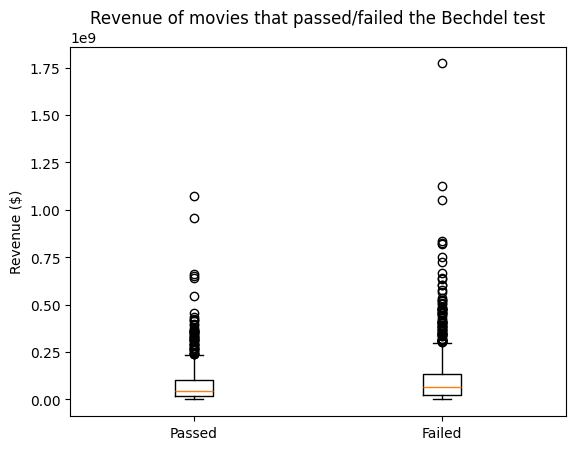

In [121]:
# get the movies that failed the Bechdel test
failed_domgross_2013 = domgross_2013_array[bechdel_array == "FAIL"]


# create a side-by-side boxplot showing the revenue of movies that passed and failed the Bechdel test
plt.boxplot([passed_domgross_2013, failed_domgross_2013], 
            labels= ["Passed", "Failed"]);
plt.ylabel("Revenue ($)");
plt.title("Revenue of movies that passed/failed the Bechdel test");



## 5. Higher dimensional arrays

In [122]:
my_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [123]:
# slicing to get a submatrix 
my_matrix[0:2, 0:2]   # like array slicing, it does return a value at the end index

array([[1, 2],
       [4, 5]])

In [124]:
my_matrix2 = my_matrix.copy()  # copy the matrix
my_matrix2[0:2, 0:2] = 100  # set particular index values to 100

my_matrix2

array([[100, 100,   3],
       [100, 100,   6],
       [  7,   8,   9]])

In [125]:
# sum all the values
print(np.sum(my_matrix))

45


In [126]:
# sum down the rows 
np.sum(my_matrix, axis = 0)

array([12, 15, 18])

In [127]:
# sum across the columns
np.sum(my_matrix, axis = 1)

array([ 6, 15, 24])

In [128]:
# create a boolean array for all values less than 5
my_matrix < 5

array([[ True,  True,  True],
       [ True, False, False],
       [False, False, False]])

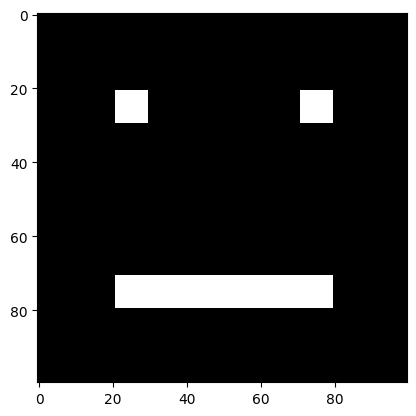

In [129]:
# what does the following do? 

face_array = np.zeros([100, 100])  # create a matrix of all 0's 

face_array[21:30, 21:30] = 1  # assign particular regions the value of 1
face_array[21:30, 71:80] = 1
face_array[71:80, 21:80] = 1

plt.imshow(face_array, cmap = 'gray');
#plt.colorbar();

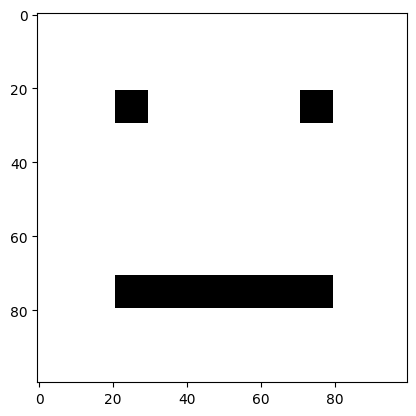

In [130]:
# convert face_array to a boolean matrix
face_array = face_array.astype("bool")
plt.imshow(~face_array, cmap = 'gray');

## 6. Image processing

We can use numerical arrays (and NumPy) to do image processing. Let's explre this now.

In [131]:
# download an image of a famous Yale alumni
#YData.download_image("burns.jpeg")

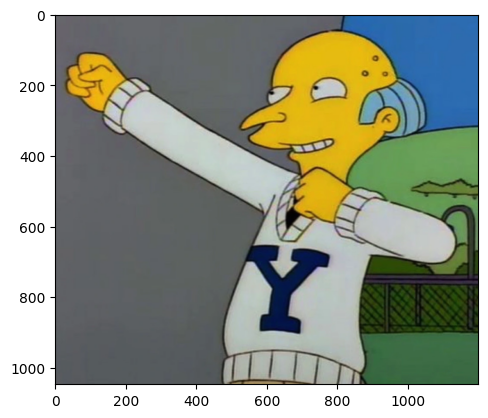

In [132]:
# load in an image 

from imageio.v3 import imread

I = imread("burns.jpeg")

plt.imshow(I);

In [133]:
# get the type and shape of the image
print(I.dtype)
I.shape

uint8


(1047, 1200, 3)

(1047, 1200, 3)
float64


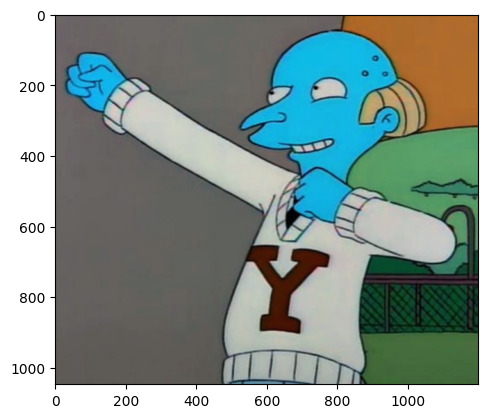

In [134]:
# Let's reverse the red and blue channels

# extract each color channel as a matrix
r_channel = I[:, :, 0]
g_channel = I[:, :, 1]
b_channel = I[:, :, 2]

# create new image where color channels will be swapped
rev_rb = np.zeros(I.shape)
print(rev_rb.shape)

# swap channels
rev_rb[:, :, 0] = b_channel
rev_rb[:, :, 1] = g_channel
rev_rb[:, :, 2] = r_channel

# convert to ints
print(rev_rb.dtype)
rev_rb = rev_rb.astype("int")

# display the image
plt.imshow(rev_rb);

(1047, 1200)


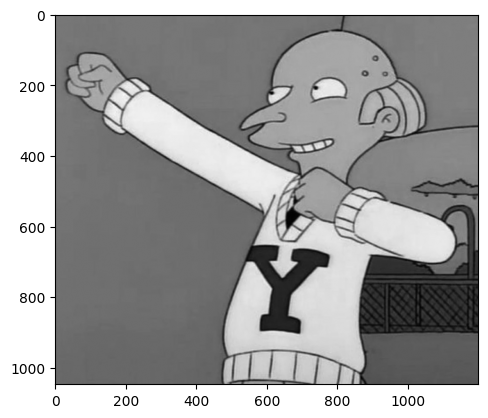

In [135]:
# To create a grayscale image - use the average value in all three r, g, b channels

mean_image = np.mean(I, axis = 2)

print(mean_image.shape)

plt.imshow(mean_image, cmap='gray');

(1047, 1200, 3)


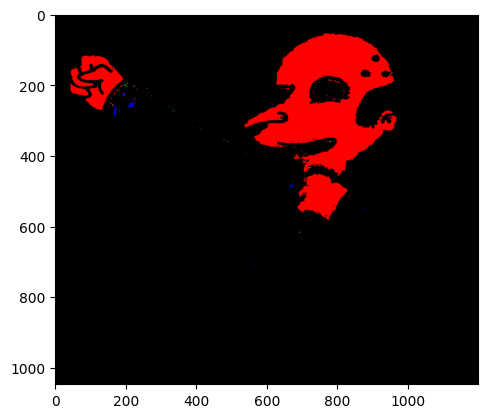

In [136]:
# Boolean arrays from images

# Find all pixels channels values greater than 215
Burns_bools = I > 215

# size of the mask is the size of the original image
print(Burns_bools.shape)

# Show the Booleans - all most all pixel values greater than 220 are in the red channel
plt.imshow(255 * Burns_bools.astype("int"));


(1047, 1200, 3)


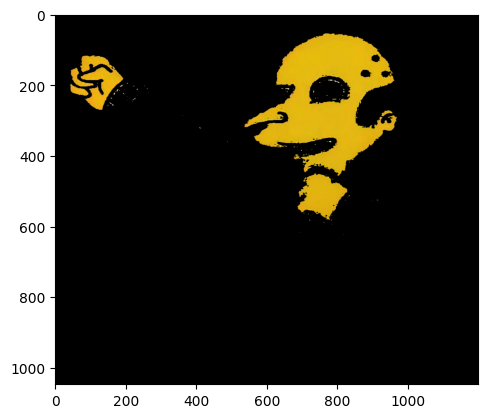

In [137]:
# Boolean masking, i.e., using Boolean arrays to extract pixel values

# Let's get only the red channel
Burns_red_channel_bools = Burns_bools[:, :, 0]

# repeat the high red pixel values across all 3 color channels
Burns_mask = np.stack([Burns_red_channel_bools, Burns_red_channel_bools, Burns_red_channel_bools], axis = 2)

# print the shape of the mask
print(Burns_mask.shape)


# Let's start with a black image - i.e., an array of all zeros of type int
Burns_only = np.zeros(I.shape, dtype=int)

# Let's fill in the original pixel values using our mask
Burns_only[Burns_mask] = I[Burns_mask]

# Show the image
plt.imshow(Burns_only.astype("int"));


## 7. Tuples

Tuples are a basic data structure in Python that is like a list. However, unlike lists, elements in tuples are "immutable" meaning that once we create a tuple, we can not modify the values in the tuple.

We create tuples by using values in parentheses separated by commas:

`my_tuple = (10, 20, 30)`

Let's explore tuples now... 


In [138]:
# create a tuple

my_tuple = (10, 20, 30)

my_tuple


(10, 20, 30)

In [139]:
# we can access elements of the tuple using square brackets (the same as lists)
my_tuple[1]

20

In [140]:
# unlike a list, we can't reassign values in a tuple 
# my_tuple[1] = 50

In [141]:
# We extract values from tuples into regular names using "tuple unpacking"

val1, val2, val3 = my_tuple


val3

30

## 8. Dictionaries

Dictionaries allow us to look up values. In particular, we provide a "key" and the dictionary return a "value". 

We can create dictionaries using the syntax: 

`my_dict = {"key1": 1, "key2": 20}`


In [142]:
# create a dictionary
my_dict = {"key1": 1, "key2": 20}
my_dict

{'key1': 1, 'key2': 20}

In [143]:
# we can access elements using square brackets 
my_dict["key2"]

20

In [144]:
# values in dictionaries can be list
my_dict2 = {"a": [1, 2, 3, 4], "b": ["a", "b", "c"], "c": [True, False]}
my_dict2["c"]

[True, False]

In [145]:
# We can create a dictionary from two lists of the same length using the dict() and zip() functions

my_list = [1, 2, 3]
my_list2 = ["a", "b", "c"]

my_dict3 = dict(zip(my_list2, my_list))

print(my_dict3)

my_dict3["b"]


{'a': 1, 'b': 2, 'c': 3}


2

In [146]:
# create a dictionary movie titles and their revenue
movie_revenue_dict = dict(zip(title, domgross_2013))

# what is revenue of Star Wars?
movie_revenue_dict["Star Wars"]

1771682790.0

In [147]:
%%capture

# You can run this code to covert this Jupyter notebook into a pdf
!quarto render class_07_answers.ipynb --cache-refresh --to pdf 